In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
airquality = pd.read_excel('AirQualityUCI.xlsx')
airquality

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T         RH        AH  
0         1267.50  13.600  48.875001  0.757754  
1          972.25  13.300  47.700000  0.725487  
2         1074.00  11.900  53.975000  0.750239  
3         1203.25  11.000  60.000000  0.786713  
4         1110.00  11.150  59.575001  0.788794  
...           ...     ...        ...       ...  
9352      1728.50  21.850  29.250000  0.756824  
9353      1269.00  24.325  23.725000  0.711864  
9354      1092.00  26.900  18.350000  0.640649  
9355       769.75  28.325  13.550000  0.513866  
9356       816.00  28.500  13.125000  0.502804  

[9357 rows x 15 columns]

Wyjaśnienia oznaczeń kolumn 
- 0 Data (DD/MM/RRRR)
- 1 Czas (GG.MM.SS)
- 2 Rzeczywiste godzinowe uśrednione stężenie CO w mg/m^3 (analizator odniesienia)
- 3 PT08.S1 (tlenek cyny) godzinowa uśredniona odpowiedź czujnika (nominalnie ukierunkowana na CO)
- 4 Prawdziwe uśrednione godzinowo całkowite stężenie węglowodorów niemetalicznych w mikrog/m^3 (analizator referencyjny)
- 5 Rzeczywiste uśrednione godzinowo stężenie benzenu w mikrog/m^3 (analizator referencyjny)
- 6 PT08.S2 (tytania) uśredniona godzinowa odpowiedź czujnika (nominalnie ukierunkowana na NMHC)
- 7 Rzeczywiste godzinowe uśrednione stężenie NOx w ppb (analizator odniesienia)
- 8 PT08.S3 (tlenek wolframu) godzinowa uśredniona odpowiedź czujnika (nominalnie ukierunkowana na NOx)
- 9 Rzeczywiste godzinowe uśrednione stężenie NO2 w mikrog/m^3 (analizator referencyjny)
- 10 PT08.S4 (tlenek wolframu) godzinowa uśredniona odpowiedź czujnika (nominalnie ukierunkowana na NO2)
- 11 PT08.S5 (tlenek indu) godzinowa uśredniona odpowiedź czujnika (nominalnie ukierunkowane na O3)
- 12 Temperatura w °C
- 13 Wilgotność względna (%)
- 14 AH bezwzględna wilgotność

In [ ]:
## Rysuje wykres zmiennej 'RH

<AxesSubplot:xlabel='Date', ylabel='Wilgotność powietrza'>

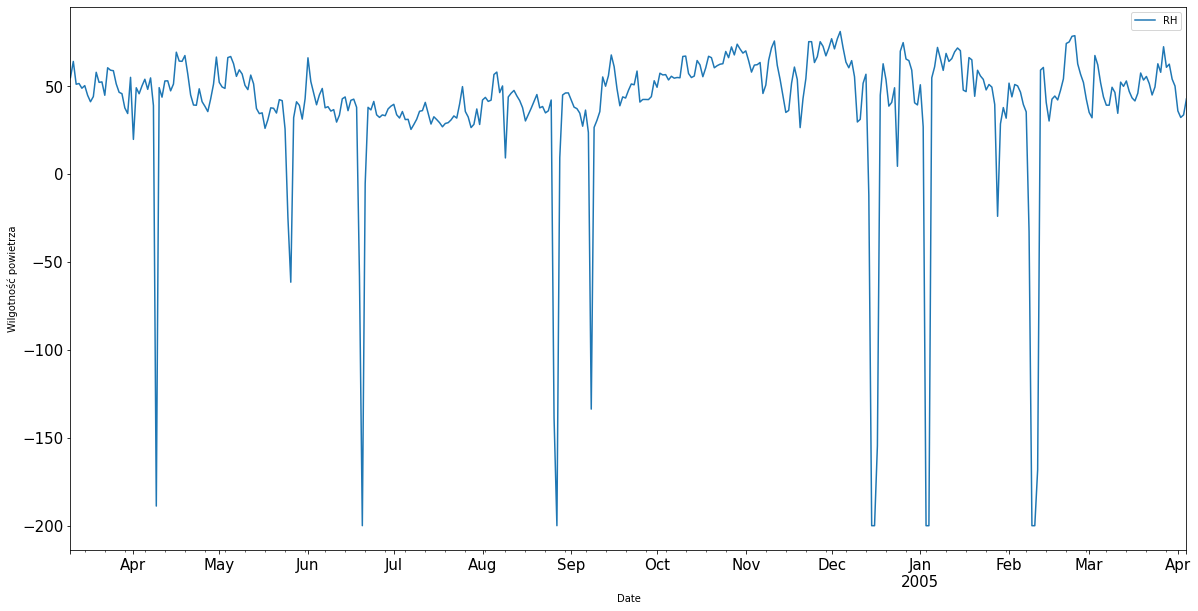

In [11]:
plt.figure(figsize=(20,10))
airquality.groupby('Date')['RH'].mean().plot(x = 'Date',
                                             y='RH',
                                             legend='auto',
                                             ylabel = "Wilgotność powietrza",
                                             fontsize =15)

### Sprawdzam jak dużo jest pustych pomiarów.

<AxesSubplot:>

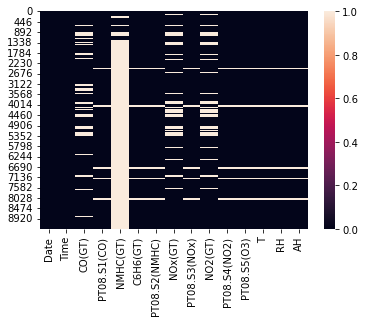

In [4]:
sns.heatmap(airquality==-200 )

In [5]:
airquality['NMHC(GT)'].value_counts()

-200    8443
 66       14
 40        9
 29        9
 88        8
        ... 
 422       1
 424       1
 339       1
 445       1
 307       1
Name: NMHC(GT), Length: 430, dtype: int64

### Ponad 80% danych w kolumnie "NMHC(GT)" jest pusta, tak wiec ta zmienna nie będzie wpływac na badanie w żaden pozytywny sposób. 

In [12]:
airquality = airquality.drop('NMHC(GT)',axis=1)

In [13]:
airquality

Date      Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  \
0    2004-03-10  18:00:00     2.6      1360.00  11.881723        1045.50   
1    2004-03-10  19:00:00     2.0      1292.25   9.397165         954.75   
2    2004-03-10  20:00:00     2.2      1402.00   8.997817         939.25   
3    2004-03-10  21:00:00     2.2      1375.50   9.228796         948.25   
4    2004-03-10  22:00:00     1.6      1272.25   6.518224         835.50   
...         ...       ...     ...          ...        ...            ...   
9352 2005-04-04  10:00:00     3.1      1314.25  13.529605        1101.25   
9353 2005-04-04  11:00:00     2.4      1162.50  11.355157        1027.00   
9354 2005-04-04  12:00:00     2.4      1142.00  12.374538        1062.50   
9355 2005-04-04  13:00:00     2.1      1002.50   9.547187         960.50   
9356 2005-04-04  14:00:00     2.2      1070.75  11.932060        1047.25   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T  \
0       166.0       1056.25    113.0       1692.00      1267.50  13.600   
1       103.0       1173.75     92.0       1558.75       972.25  13.300   
2       131.0       1140.00    114.0       1554.50      1074.00  11.900   
3       172.0       1092.00    122.0       1583.75      1203.25  11.000   
4       131.0       1205.00    116.0       1490.00      1110.00  11.150   
...       ...           ...      ...           ...          ...     ...   
9352    471.7        538.50    189.8       1374.25      1728.50  21.850   
9353    353.3        603.75    179.2       1263.50      1269.00  24.325   
9354    293.0        603.25    174.7       1240.75      1092.00  26.900   
9355    234.5        701.50    155.7       1041.00       769.75  28.325   
9356    265.2        654.00    167.7       1128.50       816.00  28.500   

             RH        AH  
0     48.875001  0.757754  
1     47.700000  0.725487  
2     53.975000  0.750239  
3     60.000000  0.786713  
4     59.575001  0.788794  
...         ...       ...  
9352  29.250000  0.756824  
9353  23.725000  0.711864  
9354  18.350000  0.640649  
9355  13.550000  0.513866  
9356  13.125000  0.502804  

[9357 rows x 14 columns]

<AxesSubplot:>

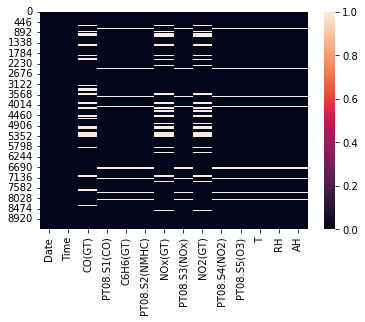

In [14]:
sns.heatmap(airquality==-200 )

### Liczba pustych wartości które trzeba zastąpić

In [15]:
(airquality==-200).sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

### Dla każdej cechy wartości pustę zostaną zastąpione medianą tej cechy.

In [16]:
for a in airquality.columns:
    for b in range(len(airquality)):
        if airquality[a][b] == -200:
            airquality[a][b] = airquality[airquality[a]!=-200][a].median()
        else:
            pass

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airquality[a][b] = airquality[airquality[a]!=-200][a].median()
C:\Users\48570\AppData\Local\Temp/ipykernel_9364/3694472898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [17]:
airquality[airquality['CO(GT)']!=-200]['CO(GT)'].median()

1.8

In [18]:
airquality

Date      Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  \
0    2004-03-10  18:00:00     2.6      1360.00  11.881723        1045.50   
1    2004-03-10  19:00:00     2.0      1292.25   9.397165         954.75   
2    2004-03-10  20:00:00     2.2      1402.00   8.997817         939.25   
3    2004-03-10  21:00:00     2.2      1375.50   9.228796         948.25   
4    2004-03-10  22:00:00     1.6      1272.25   6.518224         835.50   
...         ...       ...     ...          ...        ...            ...   
9352 2005-04-04  10:00:00     3.1      1314.25  13.529605        1101.25   
9353 2005-04-04  11:00:00     2.4      1162.50  11.355157        1027.00   
9354 2005-04-04  12:00:00     2.4      1142.00  12.374538        1062.50   
9355 2005-04-04  13:00:00     2.1      1002.50   9.547187         960.50   
9356 2005-04-04  14:00:00     2.2      1070.75  11.932060        1047.25   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T  \
0       166.0       1056.25    113.0       1692.00      1267.50  13.600   
1       103.0       1173.75     92.0       1558.75       972.25  13.300   
2       131.0       1140.00    114.0       1554.50      1074.00  11.900   
3       172.0       1092.00    122.0       1583.75      1203.25  11.000   
4       131.0       1205.00    116.0       1490.00      1110.00  11.150   
...       ...           ...      ...           ...          ...     ...   
9352    471.7        538.50    189.8       1374.25      1728.50  21.850   
9353    353.3        603.75    179.2       1263.50      1269.00  24.325   
9354    293.0        603.25    174.7       1240.75      1092.00  26.900   
9355    234.5        701.50    155.7       1041.00       769.75  28.325   
9356    265.2        654.00    167.7       1128.50       816.00  28.500   

             RH        AH  
0     48.875001  0.757754  
1     47.700000  0.725487  
2     53.975000  0.750239  
3     60.000000  0.786713  
4     59.575001  0.788794  
...         ...       ...  
9352  29.250000  0.756824  
9353  23.725000  0.711864  
9354  18.350000  0.640649  
9355  13.550000  0.513866  
9356  13.125000  0.502804  

[9357 rows x 14 columns]

<AxesSubplot:>

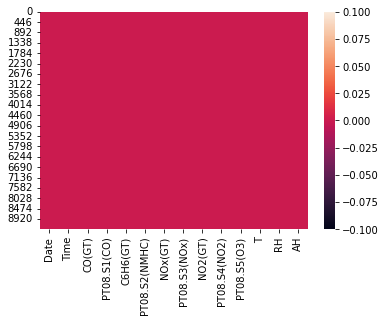

In [19]:
sns.heatmap(airquality==-200 )

### Narysujmy ponownie wykres wilgotności powietrza 

<AxesSubplot:xlabel='Date', ylabel='Wilgotność powietrza'>

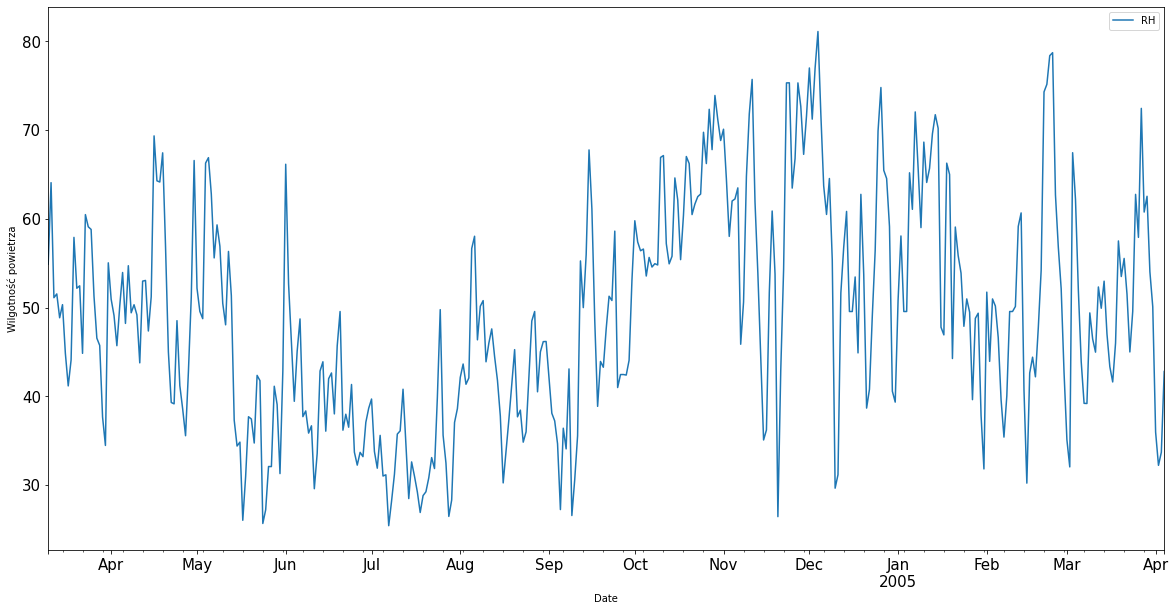

In [20]:
plt.figure(figsize=(20,10))
airquality.groupby('Date')['RH'].mean().plot(x = 'Date',
                                             y='RH',
                                             legend='auto',
                                             ylabel = "Wilgotność powietrza",
                                             fontsize =15)

### Wykres prezentuje się zupełnie inaczej. 

### Uzupełnijmy dane używając do tego metyody najbliższych sąsiadów.

In [21]:
from sklearn.impute import KNNImputer

### Zamienińmy zmienne -200 na NaN

In [22]:
airqualityKNN = pd.read_excel('AirQualityUCI.xlsx')
airqualityKNN = airqualityKNN.drop('NMHC(GT)',axis=1)



In [23]:
for a in airqualityKNN.columns:
    for b in range(len(airqualityKNN)):
        if airqualityKNN[a][b] == -200:
            airqualityKNN[a][b] = np.NaN
        else:
            pass

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/1717759646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airqualityKNN[a][b] = np.NaN


<AxesSubplot:>

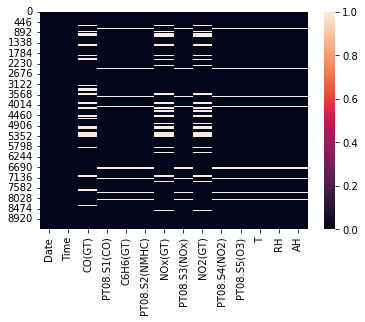

In [24]:
sns.heatmap(airqualityKNN.isna())

In [25]:
imputer = KNNImputer(n_neighbors=5)

airqualityKNNTransform = imputer.fit_transform(airqualityKNN.iloc[:, 2:])

airqualityKNN[airqualityKNN.iloc[:, 2:].columns]= airqualityKNNTransform

airqualityKNN

Date      Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  \
0    2004-03-10  18:00:00     2.6      1360.00  11.881723        1045.50   
1    2004-03-10  19:00:00     2.0      1292.25   9.397165         954.75   
2    2004-03-10  20:00:00     2.2      1402.00   8.997817         939.25   
3    2004-03-10  21:00:00     2.2      1375.50   9.228796         948.25   
4    2004-03-10  22:00:00     1.6      1272.25   6.518224         835.50   
...         ...       ...     ...          ...        ...            ...   
9352 2005-04-04  10:00:00     3.1      1314.25  13.529605        1101.25   
9353 2005-04-04  11:00:00     2.4      1162.50  11.355157        1027.00   
9354 2005-04-04  12:00:00     2.4      1142.00  12.374538        1062.50   
9355 2005-04-04  13:00:00     2.1      1002.50   9.547187         960.50   
9356 2005-04-04  14:00:00     2.2      1070.75  11.932060        1047.25   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T  \
0       166.0       1056.25    113.0       1692.00      1267.50  13.600   
1       103.0       1173.75     92.0       1558.75       972.25  13.300   
2       131.0       1140.00    114.0       1554.50      1074.00  11.900   
3       172.0       1092.00    122.0       1583.75      1203.25  11.000   
4       131.0       1205.00    116.0       1490.00      1110.00  11.150   
...       ...           ...      ...           ...          ...     ...   
9352    471.7        538.50    189.8       1374.25      1728.50  21.850   
9353    353.3        603.75    179.2       1263.50      1269.00  24.325   
9354    293.0        603.25    174.7       1240.75      1092.00  26.900   
9355    234.5        701.50    155.7       1041.00       769.75  28.325   
9356    265.2        654.00    167.7       1128.50       816.00  28.500   

             RH        AH  
0     48.875001  0.757754  
1     47.700000  0.725487  
2     53.975000  0.750239  
3     60.000000  0.786713  
4     59.575001  0.788794  
...         ...       ...  
9352  29.250000  0.756824  
9353  23.725000  0.711864  
9354  18.350000  0.640649  
9355  13.550000  0.513866  
9356  13.125000  0.502804  

[9357 rows x 14 columns]

<AxesSubplot:>

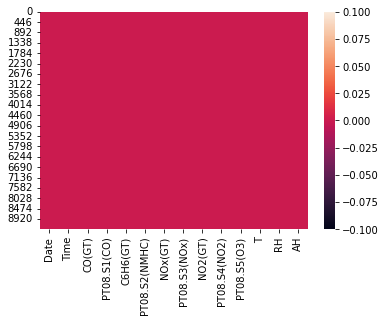

In [26]:
sns.heatmap(airqualityKNN.isna())

<AxesSubplot:xlabel='Date', ylabel='Wilgotność powietrza'>

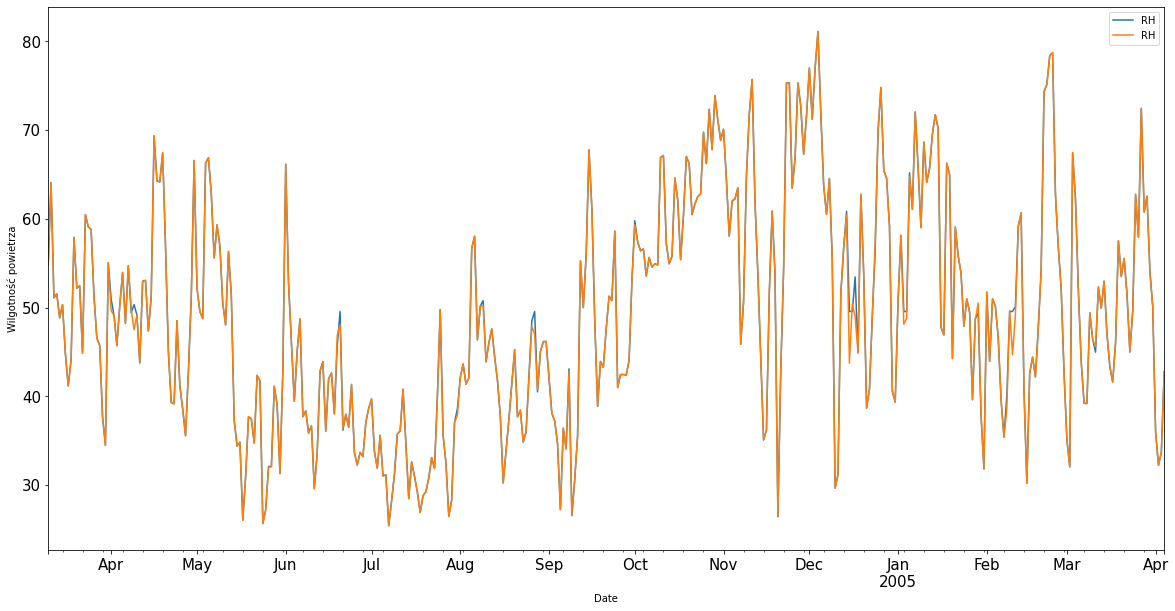

In [28]:
plt.figure(figsize=(20,10))
airquality.groupby('Date')['RH'].mean().plot(x = 'Date',
                                             y='RH',
                                             legend='auto',
                                             ylabel = "Wilgotność powietrza",
                                             fontsize =15)
airqualityKNN.groupby('Date')['RH'].mean().plot(x = 'Date',
                                             y='RH',
                                             legend='auto',
                                             ylabel = "Wilgotność powietrza",
                                             fontsize =15)

# Widzimy lekkie rożnice. Sprawdźmy wykresy watości z wiekszymi brakami. 

<AxesSubplot:xlabel='Date', ylabel='Wilgotność powietrza'>

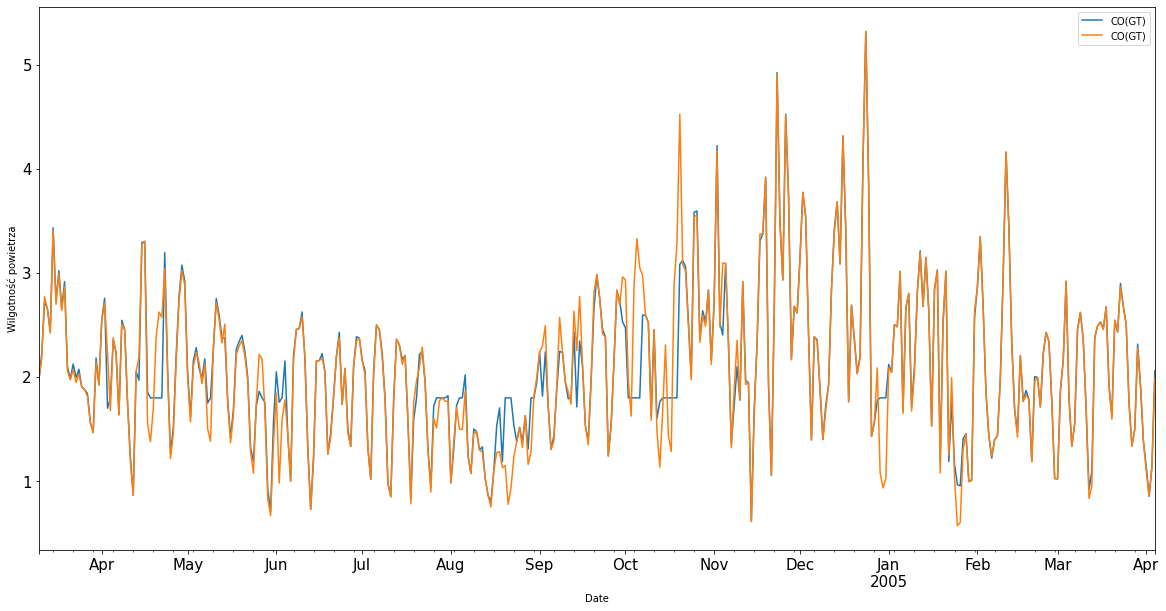

In [27]:
plt.figure(figsize=(20,10))
airquality.groupby('Date')['CO(GT)'].mean().plot(x = 'Date',
                                             y='CO(GT)',
                                             legend= 'CO(GT) uzupełnione metodą KNN',
                                             ylabel = "Wilgotność powietrza",
                                             fontsize =15)

airqualityKNN.groupby('Date')['CO(GT)'].mean().plot(x = 'Date',
                                             y='CO(GT)',
                                             legend='auto',
                                             ylabel = "Wilgotność powietrza",
                                             fontsize =15)

<AxesSubplot:>

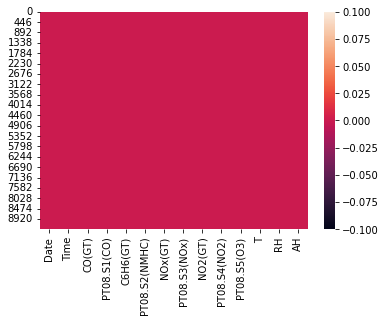

In [28]:
sns.heatmap(airqualityKNN.isna())

###  Widzimy znaczne różnice w metodzie KNN, wykresy rożnią się od siebie zauważalnie. 

## 4. Znajdź wartości odstające (outliery) zmiennej RH. Dodaj nową kolumnę "outlier"przyjmującą wartości True/False w zależności od tego czy wartość została zidentyfikowana jako outlier.

C:\Users\48570\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RH'>

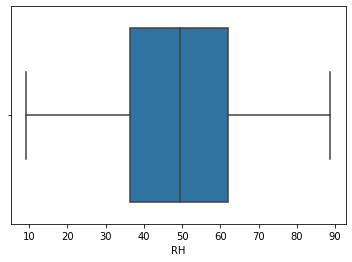

In [31]:
sns.boxplot(airqualityKNN['RH'])

<AxesSubplot:xlabel='CO(GT)', ylabel='Count'>

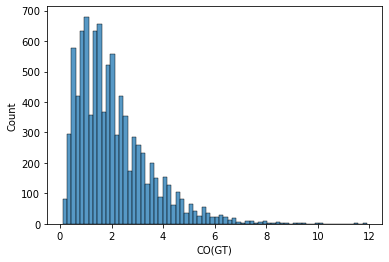

In [82]:
sns.histplot(airqualityKNN['RH'])


<AxesSubplot:xlabel='RH', ylabel='Count'>

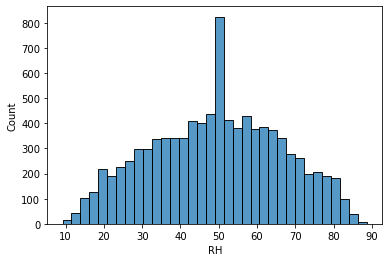

In [83]:
sns.histplot(airquality['RH'])

## Patrząc na te dwa histogramy, widzimy różnice i wyższość techniki KNN wypełniania pustych pól, nad używaniem mediany. 
## Py niewielkiej ilosci brakujących danych nie stanowi to problemu, lecz jak 3 kolumny miały prawie 20% danych pustych,
## to wypełnienie ich medianą spowoduje nagięcie wyników.

In [32]:
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [33]:
model = DBSCAN(eps= 0.8, min_samples=2).fit(airqualityKNN.iloc[:,2:])
outliers_df = pd.DataFrame(airqualityKNN.iloc[:,2:])
model.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [34]:
print(Counter(model.labels_))
print(outliers_df[model.labels_!=-1])

Counter({-1: 9324, 0: 31, 1: 2})
       CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  \
1825  2.15275  1099.707856  10.082993     939.029205  246.881252   
1826  2.15275  1099.707856  10.082993     939.029205  246.881252   
1827  2.15275  1099.707856  10.082993     939.029205  246.881252   
1828  2.15275  1099.707856  10.082993     939.029205  246.881252   
1829  2.15275  1099.707856  10.082993     939.029205  246.881252   
1830  2.15275  1099.707856  10.082993     939.029205  246.881252   
1831  2.15275  1099.707856  10.082993     939.029205  246.881252   
1832  2.15275  1099.707856  10.082993     939.029205  246.881252   
1833  2.15275  1099.707856  10.082993     939.029205  246.881252   
1834  2.15275  1099.707856  10.082993     939.029205  246.881252   
1835  2.15275  1099.707856  10.082993     939.029205  246.881252   
1836  2.15275  1099.707856  10.082993     939.029205  246.881252   
1837  2.15275  1099.707856  10.082993     939.029205  246.881252   
1838  2.15275  

## Widzimy ze pomiary nie różnią się od siebie. Są pomiary następujące jedne po drugich i nie różnią się od siebie, 
## ale mamy pomiar 705 i 1825 z takimisamymi wartościami we wszystkich cechach oprócz cechy "CO(GT)", która jest zmienna. 
## nie możemy wziąc takich obserwacji pod uwagę, ponieważ są to obserwacje spowodowane błędami urządzenia. 
## Nie ma możliwości, aby w naturze wystąpiło takie podobieństwo wysępujące jedno po drugim. A co mówić w dużych odstępach czasu.

In [145]:
### Przyjrzyjmy się pomiarom sprzed anomali pomiarowej. 

In [151]:
airqualityKNN.iloc[1820:1842,:]

Date      Time   CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  \
1820 2004-05-25  14:00:00  2.40000  1162.250000  18.450939    1252.500000   
1821 2004-05-25  15:00:00  2.10000  1058.750000  12.587302    1069.750000   
1822 2004-05-25  16:00:00  1.96000  1082.500000  12.040229    1051.000000   
1823 2004-05-25  17:00:00  2.58000  1149.500000  15.379958    1160.500000   
1824 2004-05-25  18:00:00  3.48000  1321.000000  24.877672    1426.000000   
1825 2004-05-25  19:00:00  2.15275  1099.707856  10.082993     939.029205   
1826 2004-05-25  20:00:00  2.15275  1099.707856  10.082993     939.029205   
1827 2004-05-25  21:00:00  2.15275  1099.707856  10.082993     939.029205   
1828 2004-05-25  22:00:00  2.15275  1099.707856  10.082993     939.029205   
1829 2004-05-25  23:00:00  2.15275  1099.707856  10.082993     939.029205   
1830 2004-05-26  00:00:00  2.15275  1099.707856  10.082993     939.029205   
1831 2004-05-26  01:00:00  2.15275  1099.707856  10.082993     939.029205   
1832 2004-05-26  02:00:00  2.15275  1099.707856  10.082993     939.029205   
1833 2004-05-26  03:00:00  2.15275  1099.707856  10.082993     939.029205   
1834 2004-05-26  04:00:00  2.15275  1099.707856  10.082993     939.029205   
1835 2004-05-26  05:00:00  2.15275  1099.707856  10.082993     939.029205   
1836 2004-05-26  06:00:00  2.15275  1099.707856  10.082993     939.029205   
1837 2004-05-26  07:00:00  2.15275  1099.707856  10.082993     939.029205   
1838 2004-05-26  08:00:00  2.15275  1099.707856  10.082993     939.029205   
1839 2004-05-26  09:00:00  4.00000  1302.750000  40.223805    1775.500000   
1840 2004-05-26  10:00:00  2.20000  1137.250000  14.925719    1146.250000   
1841 2004-05-26  11:00:00  1.80000  1139.250000  13.773525    1109.250000   

         NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
1820  173.000000    795.750000  138.000000   1594.500000  1248.250000   
1821  234.000000    925.000000  125.400000   1401.000000   976.250000   
1822  253.000000    938.500000  127.400000   1389.750000   897.750000   
1823  327.000000    866.500000  149.000000   1512.000000  1038.250000   
1824  219.600000    720.000000  169.000000   1859.000000  1395.000000   
1825  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1826  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1827  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1828  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1829  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1830  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1831  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1832  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1833  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1834  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1835  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1836  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1837  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1838  246.881252    835.370973  113.075515   1456.143486  1022.780725   
1839  785.200000    945.500000  161.400000   1466.750000  1607.750000   
1840  188.000000   1144.000000  136.000000   1392.250000  1326.750000   
1841  159.000000   1117.750000  135.000000   1435.750000  1291.500000   

              T        RH        AH  
1820  32.599999   9.30000  0.449949  
1821  32.599999   9.22500  0.446320  
1822  32.349999   9.95000  0.474678  
1823  32.050000  10.65000  0.499560  
1824  29.700001  12.20000  0.500744  
1825  18.316054  49.23236  1.025530  
1826  18.316054  49.23236  1.025530  
1827  18.316054  49.23236  1.025530  
1828  18.316054  49.23236  1.025530  
1829  18.316054  49.23236  1.025530  
1830  18.316054  49.23236  1.025530  
1831  18.316054  49.23236  1.025530  
1832  18.316054  49.23236  1.025530  
1833  18.316054  49.23236  

## weźmy pod lupę obserwację 1824 i 1825. W pomiarze dzieli ich godzina a wilgotność powietrza wzrostła z "12.2" do '49.5'
## Temperatra również wykazyuje spore różnice ponieważ spadła o 12 stopni Celsiusza. 

### Muszę sprawdzić czy te elementy odstające nie powstały z powodu uzupełniania 

In [37]:
airqualitytest = pd.read_excel('AirQualityUCI.xlsx')
airqualitytest = airqualitytest.drop('NMHC(GT)',axis=1)

In [38]:
airqualitytest.iloc[1820:1842,:]

Date      Time  CO(GT)  PT08.S1(CO)    C6H6(GT)  PT08.S2(NMHC)  \
1820 2004-05-25  14:00:00     2.4      1162.25   18.450939        1252.50   
1821 2004-05-25  15:00:00  -200.0      1058.75   12.587302        1069.75   
1822 2004-05-25  16:00:00  -200.0      1082.50   12.040229        1051.00   
1823 2004-05-25  17:00:00  -200.0      1149.50   15.379958        1160.50   
1824 2004-05-25  18:00:00  -200.0      1321.00   24.877672        1426.00   
1825 2004-05-25  19:00:00  -200.0      -200.00 -200.000000        -200.00   
1826 2004-05-25  20:00:00  -200.0      -200.00 -200.000000        -200.00   
1827 2004-05-25  21:00:00  -200.0      -200.00 -200.000000        -200.00   
1828 2004-05-25  22:00:00  -200.0      -200.00 -200.000000        -200.00   
1829 2004-05-25  23:00:00  -200.0      -200.00 -200.000000        -200.00   
1830 2004-05-26  00:00:00  -200.0      -200.00 -200.000000        -200.00   
1831 2004-05-26  01:00:00  -200.0      -200.00 -200.000000        -200.00   
1832 2004-05-26  02:00:00  -200.0      -200.00 -200.000000        -200.00   
1833 2004-05-26  03:00:00  -200.0      -200.00 -200.000000        -200.00   
1834 2004-05-26  04:00:00  -200.0      -200.00 -200.000000        -200.00   
1835 2004-05-26  05:00:00  -200.0      -200.00 -200.000000        -200.00   
1836 2004-05-26  06:00:00  -200.0      -200.00 -200.000000        -200.00   
1837 2004-05-26  07:00:00  -200.0      -200.00 -200.000000        -200.00   
1838 2004-05-26  08:00:00  -200.0      -200.00 -200.000000        -200.00   
1839 2004-05-26  09:00:00     4.0      1302.75   40.223805        1775.50   
1840 2004-05-26  10:00:00     2.2      1137.25   14.925719        1146.25   
1841 2004-05-26  11:00:00     1.8      1139.25   13.773525        1109.25   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)           T  \
1820    173.0        795.75    138.0       1594.50      1248.25   32.599999   
1821   -200.0        925.00   -200.0       1401.00       976.25   32.599999   
1822   -200.0        938.50   -200.0       1389.75       897.75   32.349999   
1823   -200.0        866.50   -200.0       1512.00      1038.25   32.050000   
1824   -200.0        720.00   -200.0       1859.00      1395.00   29.700001   
1825   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1826   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1827   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1828   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1829   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1830   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1831   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1832   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1833   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1834   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1835   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1836   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1837   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1838   -200.0       -200.00   -200.0       -200.00      -200.00 -200.000000   
1839   -200.0        945.50   -200.0       1466.75      1607.75   20.350000   
1840    188.0       1144.00    136.0       1392.25      1326.75   26.100000   
1841    159.0       1117.75    135.0       1435.75      1291.50   28.775000   

           RH          AH  
1820    9.300    0.449949  
1821    9.225    0.446320  
1822    9.950    0.474678  
1823   10.650    0.499560  
1824   12.200    0.500744  
1825 -200.000 -200.000000  
1826 -200.000 -200.000000  
1827 -200.000 -200.000000  
1828 -200.000 -200.000000  
1829 -200.000 -200.000000  
1830 -200.000 -200.000000  
1831 -200.000 -200.000000  
1832 -200.000 -200.000000  
1833 -200.000 -200.000000  
1

## Widzimy, że powodem anomali jest to, że nie zostały usunięte obserwacje z wieloma brakami. To spowodowało błędne wypełnienia. 

<AxesSubplot:>

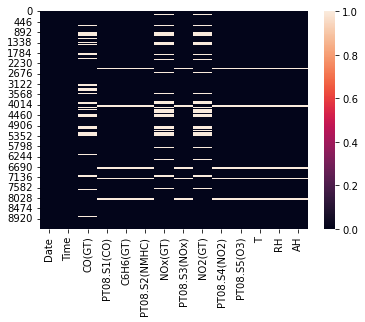

In [258]:
sns.heatmap(airqualitytest==-200)

In [39]:
for a in airqualitytest.columns:
    for b in range(len(airqualitytest)):
        if airqualitytest[a][b] == -200:
            airqualitytest[a][b] = np.NaN
        else:
            pass

C:\Users\48570\AppData\Local\Temp/ipykernel_9364/1340578677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airqualitytest[a][b] = np.NaN


In [40]:
airqualitytest.dropna(thresh=10).count()

Date             8991
Time             8991
CO(GT)           7344
PT08.S1(CO)      8991
C6H6(GT)         8991
PT08.S2(NMHC)    8991
NOx(GT)          7396
PT08.S3(NOx)     8991
NO2(GT)          7393
PT08.S4(NO2)     8991
PT08.S5(O3)      8991
T                8991
RH               8991
AH               8991
dtype: int64

<AxesSubplot:>

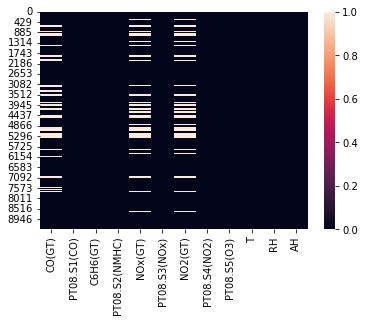

In [41]:
sns.heatmap(airqualitytest.iloc[:,2:].dropna(thresh=8).isna())

In [42]:
airqualitytest.iloc[:,2:].dropna(thresh=8).count()

CO(GT)           7344
PT08.S1(CO)      8991
C6H6(GT)         8991
PT08.S2(NMHC)    8991
NOx(GT)          7396
PT08.S3(NOx)     8991
NO2(GT)          7393
PT08.S4(NO2)     8991
PT08.S5(O3)      8991
T                8991
RH               8991
AH               8991
dtype: int64

In [43]:
### Usuwamy obserwacje z zbyt dużymi brakami.

In [44]:
airqualitytest = airqualitytest.dropna(thresh=8)

In [45]:
airqualitytest

Date      Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  \
0    2004-03-10  18:00:00     2.6      1360.00  11.881723        1045.50   
1    2004-03-10  19:00:00     2.0      1292.25   9.397165         954.75   
2    2004-03-10  20:00:00     2.2      1402.00   8.997817         939.25   
3    2004-03-10  21:00:00     2.2      1375.50   9.228796         948.25   
4    2004-03-10  22:00:00     1.6      1272.25   6.518224         835.50   
...         ...       ...     ...          ...        ...            ...   
9352 2005-04-04  10:00:00     3.1      1314.25  13.529605        1101.25   
9353 2005-04-04  11:00:00     2.4      1162.50  11.355157        1027.00   
9354 2005-04-04  12:00:00     2.4      1142.00  12.374538        1062.50   
9355 2005-04-04  13:00:00     2.1      1002.50   9.547187         960.50   
9356 2005-04-04  14:00:00     2.2      1070.75  11.932060        1047.25   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T  \
0       166.0       1056.25    113.0       1692.00      1267.50  13.600   
1       103.0       1173.75     92.0       1558.75       972.25  13.300   
2       131.0       1140.00    114.0       1554.50      1074.00  11.900   
3       172.0       1092.00    122.0       1583.75      1203.25  11.000   
4       131.0       1205.00    116.0       1490.00      1110.00  11.150   
...       ...           ...      ...           ...          ...     ...   
9352    471.7        538.50    189.8       1374.25      1728.50  21.850   
9353    353.3        603.75    179.2       1263.50      1269.00  24.325   
9354    293.0        603.25    174.7       1240.75      1092.00  26.900   
9355    234.5        701.50    155.7       1041.00       769.75  28.325   
9356    265.2        654.00    167.7       1128.50       816.00  28.500   

             RH        AH  
0     48.875001  0.757754  
1     47.700000  0.725487  
2     53.975000  0.750239  
3     60.000000  0.786713  
4     59.575001  0.788794  
...         ...       ...  
9352  29.250000  0.756824  
9353  23.725000  0.711864  
9354  18.350000  0.640649  
9355  13.550000  0.513866  
9356  13.125000  0.502804  

[8991 rows x 14 columns]

In [46]:
imputer = KNNImputer(n_neighbors=3)

airqualityKNNTransform = imputer.fit_transform(airqualitytest.iloc[:, 2:])

airqualitytest[airqualitytest.iloc[:, 2:].columns]= airqualityKNNTransform

airqualitytest

Date      Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  \
0    2004-03-10  18:00:00     2.6      1360.00  11.881723        1045.50   
1    2004-03-10  19:00:00     2.0      1292.25   9.397165         954.75   
2    2004-03-10  20:00:00     2.2      1402.00   8.997817         939.25   
3    2004-03-10  21:00:00     2.2      1375.50   9.228796         948.25   
4    2004-03-10  22:00:00     1.6      1272.25   6.518224         835.50   
...         ...       ...     ...          ...        ...            ...   
9352 2005-04-04  10:00:00     3.1      1314.25  13.529605        1101.25   
9353 2005-04-04  11:00:00     2.4      1162.50  11.355157        1027.00   
9354 2005-04-04  12:00:00     2.4      1142.00  12.374538        1062.50   
9355 2005-04-04  13:00:00     2.1      1002.50   9.547187         960.50   
9356 2005-04-04  14:00:00     2.2      1070.75  11.932060        1047.25   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T  \
0       166.0       1056.25    113.0       1692.00      1267.50  13.600   
1       103.0       1173.75     92.0       1558.75       972.25  13.300   
2       131.0       1140.00    114.0       1554.50      1074.00  11.900   
3       172.0       1092.00    122.0       1583.75      1203.25  11.000   
4       131.0       1205.00    116.0       1490.00      1110.00  11.150   
...       ...           ...      ...           ...          ...     ...   
9352    471.7        538.50    189.8       1374.25      1728.50  21.850   
9353    353.3        603.75    179.2       1263.50      1269.00  24.325   
9354    293.0        603.25    174.7       1240.75      1092.00  26.900   
9355    234.5        701.50    155.7       1041.00       769.75  28.325   
9356    265.2        654.00    167.7       1128.50       816.00  28.500   

             RH        AH  
0     48.875001  0.757754  
1     47.700000  0.725487  
2     53.975000  0.750239  
3     60.000000  0.786713  
4     59.575001  0.788794  
...         ...       ...  
9352  29.250000  0.756824  
9353  23.725000  0.711864  
9354  18.350000  0.640649  
9355  13.550000  0.513866  
9356  13.125000  0.502804  

[8991 rows x 14 columns]

<AxesSubplot:xlabel='Date', ylabel='Wilgotność powietrza'>

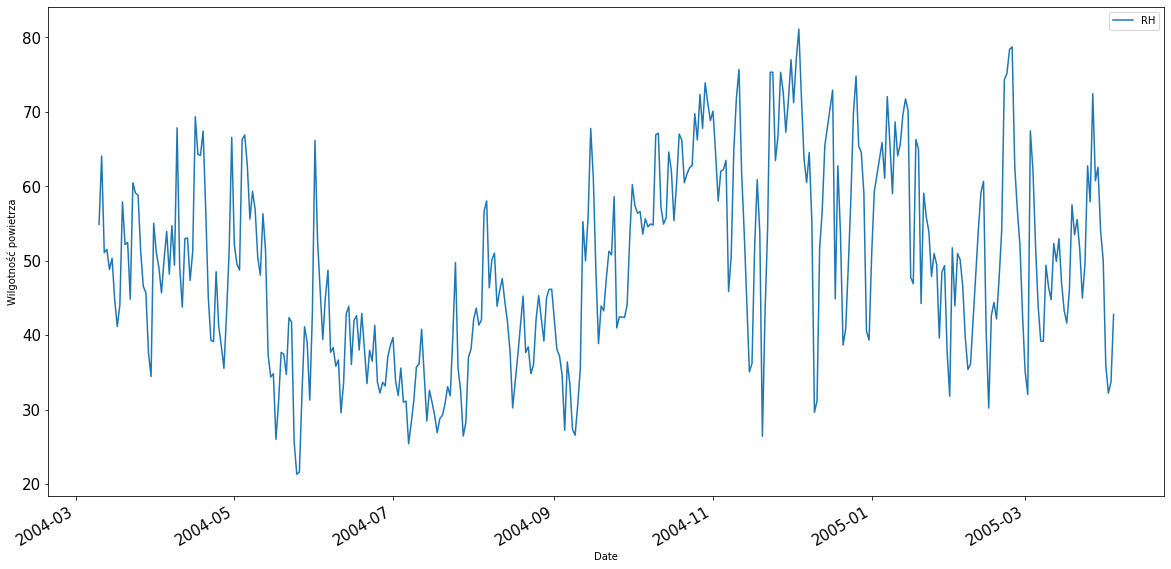

In [47]:
plt.figure(figsize=(20,10))
airqualitytest.groupby('Date')['RH'].mean().plot(x = 'Date',
                                             y='RH',
                                             legend='auto',
                                             ylabel = "Wilgotność powietrza",
                                             fontsize =15)

In [49]:
airqualitytest

Date      Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  \
0    2004-03-10  18:00:00     2.6      1360.00  11.881723        1045.50   
1    2004-03-10  19:00:00     2.0      1292.25   9.397165         954.75   
2    2004-03-10  20:00:00     2.2      1402.00   8.997817         939.25   
3    2004-03-10  21:00:00     2.2      1375.50   9.228796         948.25   
4    2004-03-10  22:00:00     1.6      1272.25   6.518224         835.50   
...         ...       ...     ...          ...        ...            ...   
9352 2005-04-04  10:00:00     3.1      1314.25  13.529605        1101.25   
9353 2005-04-04  11:00:00     2.4      1162.50  11.355157        1027.00   
9354 2005-04-04  12:00:00     2.4      1142.00  12.374538        1062.50   
9355 2005-04-04  13:00:00     2.1      1002.50   9.547187         960.50   
9356 2005-04-04  14:00:00     2.2      1070.75  11.932060        1047.25   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T  \
0       166.0       1056.25    113.0       1692.00      1267.50  13.600   
1       103.0       1173.75     92.0       1558.75       972.25  13.300   
2       131.0       1140.00    114.0       1554.50      1074.00  11.900   
3       172.0       1092.00    122.0       1583.75      1203.25  11.000   
4       131.0       1205.00    116.0       1490.00      1110.00  11.150   
...       ...           ...      ...           ...          ...     ...   
9352    471.7        538.50    189.8       1374.25      1728.50  21.850   
9353    353.3        603.75    179.2       1263.50      1269.00  24.325   
9354    293.0        603.25    174.7       1240.75      1092.00  26.900   
9355    234.5        701.50    155.7       1041.00       769.75  28.325   
9356    265.2        654.00    167.7       1128.50       816.00  28.500   

             RH        AH  
0     48.875001  0.757754  
1     47.700000  0.725487  
2     53.975000  0.750239  
3     60.000000  0.786713  
4     59.575001  0.788794  
...         ...       ...  
9352  29.250000  0.756824  
9353  23.725000  0.711864  
9354  18.350000  0.640649  
9355  13.550000  0.513866  
9356  13.125000  0.502804  

[8991 rows x 14 columns]

In [50]:
model = DBSCAN(eps= 0.8, min_samples=2).fit(airqualitytest.iloc[:,2:])
outliers_df = pd.DataFrame(airqualitytest.iloc[:,2:])
model.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [51]:
print(Counter(model.labels_))
print(outliers_df[model.labels_!=-1])

Counter({-1: 8991})
Empty DataFrame
Columns: [CO(GT), PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []


In [53]:
s = []
for a in range(len(airqualitytest.groupby('Date')['RH'].mean())-1):
    roznica = abs(airqualitytest.groupby('Date')['RH'].mean()[a] - airqualitytest.groupby('Date')['RH'].mean()[a+1])
    if roznica > 30:
        s.append((airqualitytest.groupby('Date').mean().iloc[a,:],airqualitytest.groupby('Date').mean().iloc[a+1,:]))
s 

[(CO(GT)             1.820833
  PT08.S1(CO)      970.843750
  C6H6(GT)           7.461835
  PT08.S2(NMHC)    831.041667
  NOx(GT)          316.880556
  PT08.S3(NOx)     904.385417
  NO2(GT)          146.184722
  PT08.S4(NO2)     874.229167
  PT08.S5(O3)      981.843750
  T                  4.289583
  RH                32.037500
  AH                 0.251821
  Name: 2005-03-02 00:00:00, dtype: float64,
  CO(GT)              2.166667
  PT08.S1(CO)      1184.211806
  C6H6(GT)            8.150130
  PT08.S2(NMHC)     884.468750
  NOx(GT)           371.243056
  PT08.S3(NOx)      686.718750
  NO2(GT)           157.579167
  PT08.S4(NO2)     1162.260417
  PT08.S5(O3)      1304.163194
  T                   4.587847
  RH                 67.445486
  AH                  0.577536
  Name: 2005-03-03 00:00:00, dtype: float64)]

Mamy jeden dzień różnicy pomiedzy tymi pomiarami, a rożnica w cisnieniu wynośi '35'.

### 

In [54]:
range(len(airqualitytest))

range(0, 8991)

In [55]:
model = DBSCAN(eps= 0.8, min_samples=19).fit(airqualitytest.iloc[:,2:])
outliers_df = pd.DataFrame(airqualitytest.iloc[:,2:])
model.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [56]:
print(Counter(model.labels_))
print(outliers_df[model.labels_!=-1])

Counter({-1: 8991})
Empty DataFrame
Columns: [CO(GT), PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []


In [57]:
for a in range(2,100):
    model = DBSCAN(eps= 0.8, min_samples=a).fit(airqualitytest.iloc[:,2:])
    print('min_samples={}'.format(a))
    print(Counter(model.labels_))
    


min_samples=2
Counter({-1: 8991})
min_samples=3
Counter({-1: 8991})
min_samples=4
Counter({-1: 8991})
min_samples=5
Counter({-1: 8991})
min_samples=6
Counter({-1: 8991})
min_samples=7
Counter({-1: 8991})
min_samples=8
Counter({-1: 8991})
min_samples=9
Counter({-1: 8991})
min_samples=10
Counter({-1: 8991})
min_samples=11
Counter({-1: 8991})
min_samples=12
Counter({-1: 8991})
min_samples=13
Counter({-1: 8991})
min_samples=14
Counter({-1: 8991})
min_samples=15
Counter({-1: 8991})
min_samples=16
Counter({-1: 8991})
min_samples=17
Counter({-1: 8991})
min_samples=18
Counter({-1: 8991})
min_samples=19
Counter({-1: 8991})
min_samples=20
Counter({-1: 8991})
min_samples=21
Counter({-1: 8991})
min_samples=22
Counter({-1: 8991})
min_samples=23
Counter({-1: 8991})
min_samples=24
Counter({-1: 8991})
min_samples=25
Counter({-1: 8991})
min_samples=26
Counter({-1: 8991})
min_samples=27
Counter({-1: 8991})
min_samples=28
Counter({-1: 8991})
min_samples=29
Counter({-1: 8991})
min_samples=30
Counter({-1: 

In [383]:
model = DBSCAN(eps= 0.8, min_samples=19).fit(airquality.iloc[:,2:])
outliers_df = pd.DataFrame(airquality.iloc[:,2:])
model.labels_

print(Counter(model.labels_))
print(outliers_df[model.labels_!=-1])

Counter({-1: 9316, 0: 41})
      CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
705      1.0       1063.0  8.239851          909.0    179.8         805.5   
1825     1.8       1063.0  8.239851          909.0    179.8         805.5   
1826     1.8       1063.0  8.239851          909.0    179.8         805.5   
1827     1.8       1063.0  8.239851          909.0    179.8         805.5   
1828     1.8       1063.0  8.239851          909.0    179.8         805.5   
1829     1.8       1063.0  8.239851          909.0    179.8         805.5   
1830     1.8       1063.0  8.239851          909.0    179.8         805.5   
1831     1.8       1063.0  8.239851          909.0    179.8         805.5   
1832     1.8       1063.0  8.239851          909.0    179.8         805.5   
1833     1.8       1063.0  8.239851          909.0    179.8         805.5   
1834     1.8       1063.0  8.239851          909.0    179.8         805.5   
1835     1.8       1063.0  8.239851          909.

In [58]:
def zmiana():
    for a in model.labels_:
        if a == -1:
            return False
        else:
            return True 

In [59]:
print(Counter(model.labels_))


Counter({-1: 8991})


In [60]:
airquality['Outliers'] = model.labels_
airquality

ValueError: Length of values (8991) does not match length of index (9357)

In [475]:
airquality['Outliers'].value_counts()

-1    9316
 0      41
Name: Outliers, dtype: int64

In [476]:
airquality['Outliers'] = airquality['Outliers'].apply(lambda x: True if x == 0 else False)
airquality

Date      Time  CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  \
0    2004-03-10  18:00:00     2.6      1360.00  11.881723        1045.50   
1    2004-03-10  19:00:00     2.0      1292.25   9.397165         954.75   
2    2004-03-10  20:00:00     2.2      1402.00   8.997817         939.25   
3    2004-03-10  21:00:00     2.2      1375.50   9.228796         948.25   
4    2004-03-10  22:00:00     1.6      1272.25   6.518224         835.50   
...         ...       ...     ...          ...        ...            ...   
9352 2005-04-04  10:00:00     3.1      1314.25  13.529605        1101.25   
9353 2005-04-04  11:00:00     2.4      1162.50  11.355157        1027.00   
9354 2005-04-04  12:00:00     2.4      1142.00  12.374538        1062.50   
9355 2005-04-04  13:00:00     2.1      1002.50   9.547187         960.50   
9356 2005-04-04  14:00:00     2.2      1070.75  11.932060        1047.25   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T  \
0       166.0       1056.25    113.0       1692.00      1267.50  13.600   
1       103.0       1173.75     92.0       1558.75       972.25  13.300   
2       131.0       1140.00    114.0       1554.50      1074.00  11.900   
3       172.0       1092.00    122.0       1583.75      1203.25  11.000   
4       131.0       1205.00    116.0       1490.00      1110.00  11.150   
...       ...           ...      ...           ...          ...     ...   
9352    471.7        538.50    189.8       1374.25      1728.50  21.850   
9353    353.3        603.75    179.2       1263.50      1269.00  24.325   
9354    293.0        603.25    174.7       1240.75      1092.00  26.900   
9355    234.5        701.50    155.7       1041.00       769.75  28.325   
9356    265.2        654.00    167.7       1128.50       816.00  28.500   

             RH        AH  Outliers  
0     48.875001  0.757754     False  
1     47.700000  0.725487     False  
2     53.975000  0.750239     False  
3     60.000000  0.786713     False  
4     59.575001  0.788794     False  
...         ...       ...       ...  
9352  29.250000  0.756824     False  
9353  23.725000  0.711864     False  
9354  18.350000  0.640649     False  
9355  13.550000  0.513866     False  
9356  13.125000  0.502804     False  

[9357 rows x 15 columns]

In [477]:
airquality['Outliers'].value_counts()

False    9316
True       41
Name: Outliers, dtype: int64

No handles with labels found to put in legend.


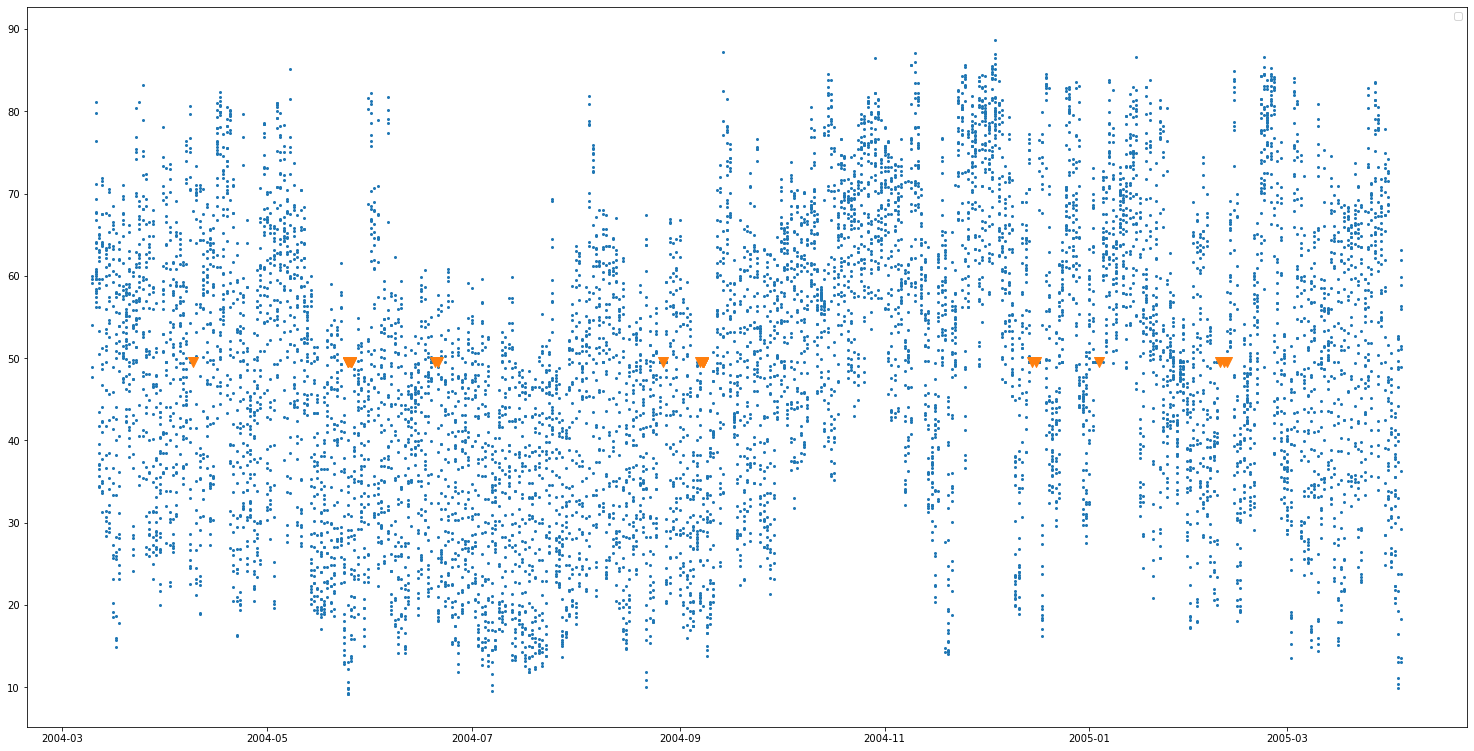

In [482]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([.1,.1,1,1])
colors = model.labels_
ax.scatter(airquality[airquality['Outliers']==False]['Date'],airquality[airquality['Outliers']==False]['RH'], s =4, cmap = 'coolwarm' )
ax.scatter(airquality[airquality['Outliers']==True]['Date'],airquality[airquality['Outliers']==True]['RH'], s =100, cmap = 'coolwarm', marker='v' )


ax.legend()

In [92]:
Counter(colors)

Counter({-1: 9309, 0: 41, 1: 2, 2: 2, 3: 3})

In [434]:
colors.shape

(9357,)

<AxesSubplot:xlabel='T', ylabel='Count'>

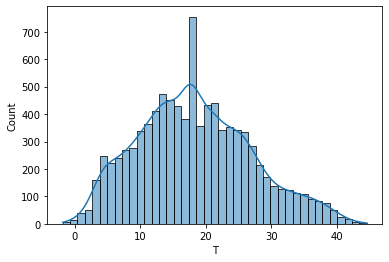

In [388]:
sns.histplot(airquality['T'],kde=True)


<AxesSubplot:xlabel='T', ylabel='Count'>

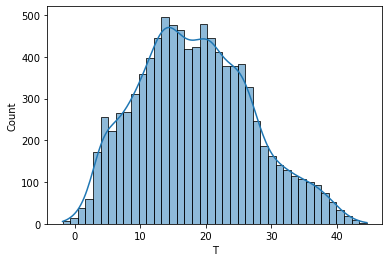

In [389]:
sns.histplot(airqualityKNN['T'],kde=True)


WWystępuje lekka prawostronna asymetira 

In [391]:
airqualityKNN.corr()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.879017  0.928300       0.911359  0.808823   
PT08.S1(CO)    0.879017     1.000000  0.884325       0.893509  0.715927   
C6H6(GT)       0.928300     0.884325  1.000000       0.982270  0.734740   
PT08.S2(NMHC)  0.911359     0.893509  0.982270       1.000000  0.719693   
NOx(GT)        0.808823     0.715927  0.734740       0.719693  1.000000   
PT08.S3(NOx)  -0.708818    -0.773736 -0.737891      -0.798378 -0.656227   
NO2(GT)        0.705799     0.654902  0.637396       0.668085  0.770101   
PT08.S4(NO2)   0.633083     0.685937  0.767299       0.778889  0.277801   
PT08.S5(O3)    0.855327     0.900249  0.866957       0.881592  0.785743   
T              0.034947     0.051695  0.201608       0.243992 -0.222028   
RH             0.019250     0.110036 -0.065741      -0.094405  0.168670   
AH             0.038451     0.134160  0.165667       0.184747 -0.136809   

               PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T  \
CO(GT)            -0.708818  0.705799      0.633083     0.855327  0.034947   
PT08.S1(CO)       -0.773736  0.654902      0.685937     0.900249  0.051695   
C6H6(GT)          -0.737891  0.637396      0.767299     0.866957  0.201608   
PT08.S2(NMHC)     -0.798378  0.668085      0.778889     0.881592  0.243992   
NOx(GT)           -0.656227  0.770101      0.277801     0.785743 -0.222028   
PT08.S3(NOx)       1.000000 -0.651508     -0.541961    -0.798449 -0.148697   
NO2(GT)           -0.651508  1.000000      0.201968     0.715710 -0.155935   
PT08.S4(NO2)      -0.541961  0.201968      1.000000     0.594818  0.559899   
PT08.S5(O3)       -0.798449  0.715710      0.594818     1.000000 -0.023785   
T                 -0.148697 -0.155935      0.559899    -0.023785  1.000000   
RH                -0.052076 -0.114753     -0.035880     0.121591 -0.582478   
AH                -0.230356 -0.318650      0.626515     0.070014  0.655065   

                     RH        AH  
CO(GT)         0.019250  0.038451  
PT08.S1(CO)    0.110036  0.134160  
C6H6(GT)      -0.065741  0.165667  
PT08.S2(NMHC) -0.094405  0.184747  
NOx(GT)        0.168670 -0.136809  
PT08.S3(NOx)  -0.052076 -0.230356  
NO2(GT)       -0.114753 -0.318650  
PT08.S4(NO2)  -0.035880  0.626515  
PT08.S5(O3)    0.121591  0.070014  
T             -0.582478  0.655065  
RH             1.000000  0.164924  
AH             0.164924  1.000000

<AxesSubplot:>

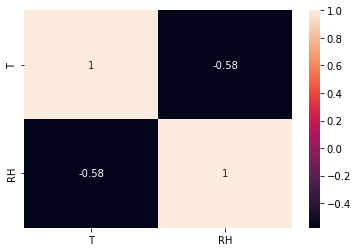

In [396]:
sns.heatmap(airqualityKNN[['T','RH']].corr(), annot=True)

In [ ]:
Widzimy, że ciśnienie jest ujemnie skorelowane z temperaturą. czyli:
    Wraz ze wzrostem temperatury, wilogtność powietrza maleje i na odwrót, wraz ze wzrostem ciśnienia, temperatura maleje. 
    

In [428]:

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(x):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(x)
    random_data_mean = np.mean(x)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    print(upper_limit)
    # Generate outliers
    for outlier in x:
        if outlier > upper_limit :
            anomalies.append(outlier)
        elif outlier < lower_limit:   
            anomalies.append(outlier)
    return anomalies

find_anomalies(airqualityKNN['RH'])

-2.0828997739576423
100.43670011729478


[]

In [419]:
np.std(airqualityKNN['RH'])

17.086599981875402

In [420]:
np.mean(airqualityKNN['RH'])

49.176900171668564